In [45]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import copy
import math
# pytorch imports
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

In [47]:
size=100
ez=np.zeros(size)
hy=np.zeros(size)
#ez[50]=1

In [48]:

def fieldupdate3(T=10,size=100,E=ez,H=hy):
    imp0=377
    E_history=[]
    H_history=[]
    test=[]
    for t in range(T):
        for i in range(len(E)-1):
            H[i]=H[i]+(E[i+1]-E[i])/imp0
        for j in range(len(E)-1):
            E[j+1]=E[j+1]+(H[j+1]-H[j])*imp0

        E[0]=math.sin(0.1*t)
        test.append(E[int(0.5*size)])
        E_history.append(E.copy())
        H_history.append(H.copy())
    with open("E field history.txt", 'w') as f:
        for member in E_history:
            f.write(str(member) + '\n')
    with open("H field history.txt", 'w') as f:
        for member in H_history:
            f.write(str(member) + '\n')
    E_history=np.array(E_history)
    return E,H,test, E_history



In [49]:
EZ,HY,test,E_history=fieldupdate3(100,size,ez,hy)
print(type(E_history))
E_new=E_history.copy().reshape(-1)
print(E_new.shape)

print(test)

<class 'numpy.ndarray'>
(10000,)
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.09983341664682815, 0.19866933079506122, 0.2955202066613396, 0.3894183423086505, 0.479425538604203, 0.5646424733950355, 0.6442176872376911, 0.7173560908995228, 0.7833269096274834, 0.8414709848078965, 0.8912073600614353, 0.9320390859672264, 0.963558185417193, 0.9854497299884603, 0.9974949866040544, 0.9995736030415051, 0.9916648104524686, 0.9738476308781951, 0.9463000876874145, 0.9092974268256817, 0.8632093666488736, 0.80849640381959, 0.74570521217672, 0.6754631805511506, 0.5984721441039564, 0.5155013718214642, 0.4273798802338298, 0.33498815015590466, 0.239249329213982, 0.1411200080598672, 0.04158066243329049, -0.058374143427580086, -0.15774569414324865, -0.25554110202683167, -0.35078322768961984, -0.44

In [51]:

X=[]
Y=[]
for i in range(100):
    for j in range(100):
        X.append(i)
        Y.append(j)
X=np.array(X)
Y=np.array(Y)
#print(test)

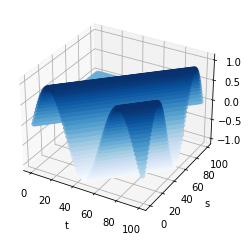

In [58]:
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
zdata = E_new
xdata = X
ydata = Y
plt.xlabel('s')
plt.ylabel('t')
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Blues');



In [56]:
print(E_history)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.09983342  0.          0.         ...  0.          0.
   0.        ]
 [ 0.19866933  0.09983342  0.         ...  0.          0.
   0.        ]
 ...
 [-0.27176063 -0.17432678 -0.07515112 ...  0.          0.
   0.        ]
 [-0.36647913 -0.27176063 -0.17432678 ...  0.09983342  0.
   0.        ]
 [-0.45753589 -0.36647913 -0.27176063 ...  0.19866933  0.09983342
   0.        ]]


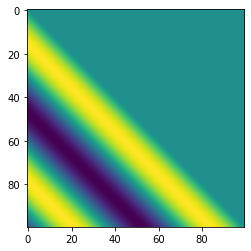

In [57]:
plt.imshow(E_history)

In [ ]:

plt.plot(test)
plt.xlabel('Time Step')
plt.ylabel('EZ(50)(mV)')
plt.show()

In [ ]:

#plot for final states
plt.plot(EZ)
plt.xlabel('Spetial Step')
plt.ylabel('EZ(mV)')
plt.show()
plt.plot(HY)
plt.xlabel('Spetial Step')
plt.ylabel('HY(mH)')
#plt.ylabel('some numbers')
plt.show()# 

In [ ]:
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.zeros(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

In [ ]:
plt.plot(E_history[])
plt.xlabel('Spetial Step')
plt.ylabel('EZ(mV)')
plt.show()

In [ ]:
file= open("E field history.txt", "r")
data=file.read()
print((data))